In [1]:
import numpy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display

y, sr = librosa.load('./recorded/output.wav')
y, _ = librosa.effects.trim(y, top_db=10)
ipd.Audio(y, rate=sr)

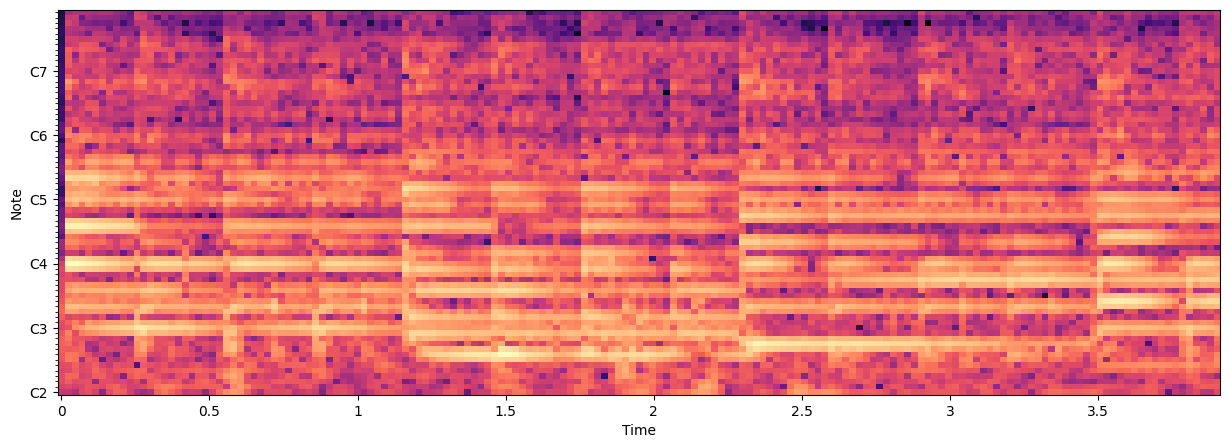

In [2]:
HOP_LENGTH = 1024
F_MIN = librosa.midi_to_hz(36)
C = librosa.cqt(y, sr=sr, fmin=F_MIN, n_bins=72, hop_length=HOP_LENGTH)

logC = librosa.amplitude_to_db(numpy.abs(C))
plt.figure(figsize=(15, 5))
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note', fmin=F_MIN)

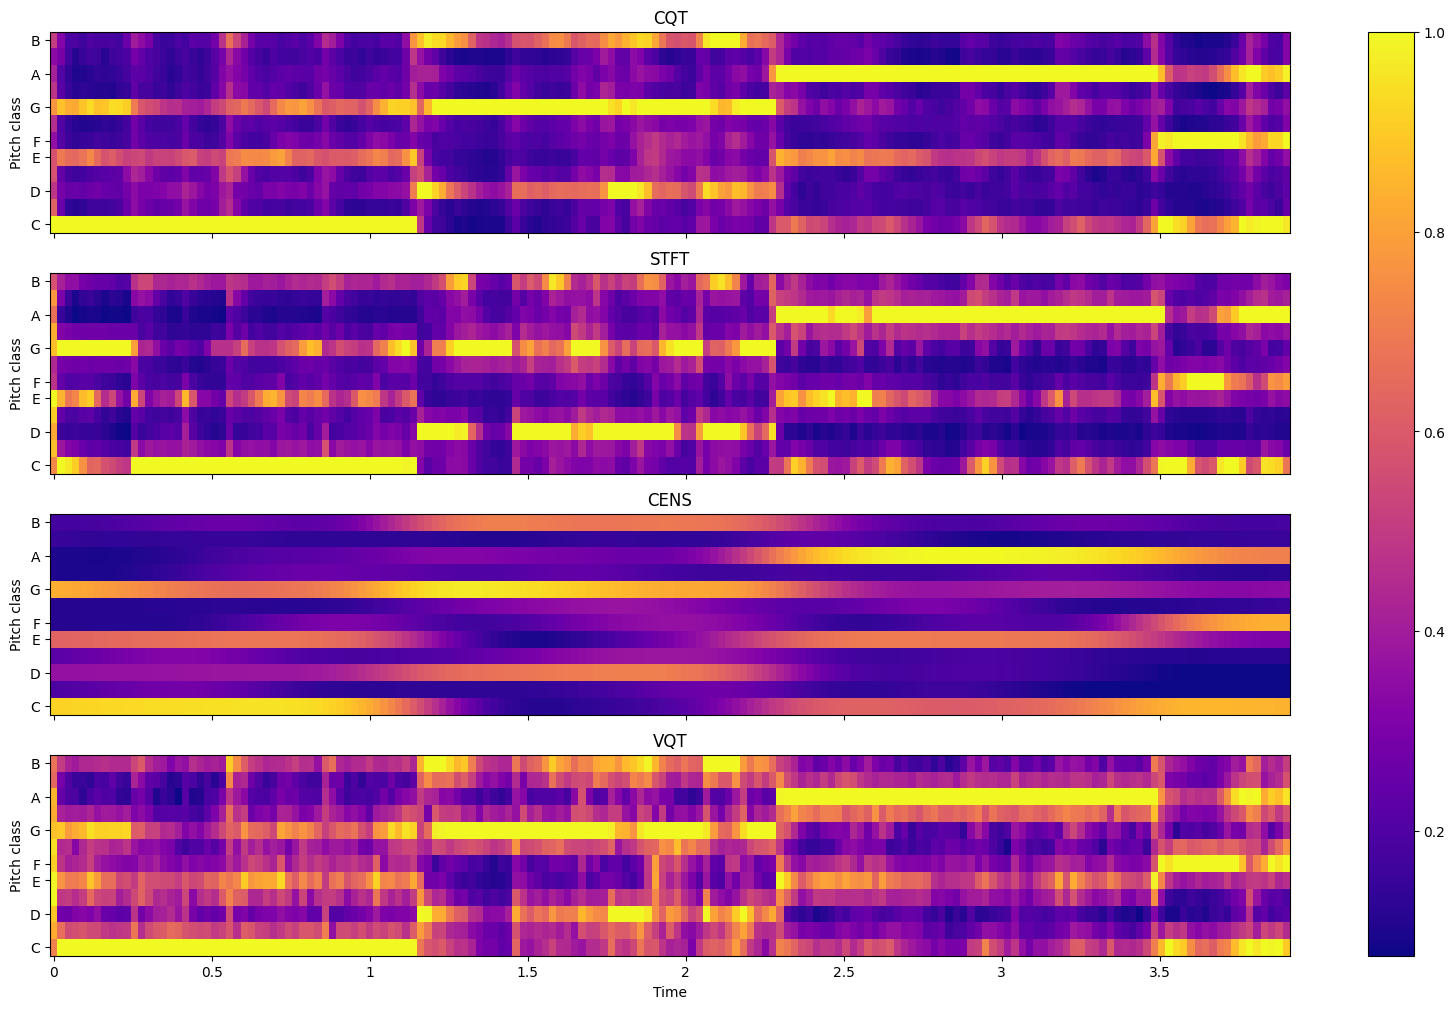

In [3]:
''' Explore different chroma representations '''
chromas = {
    'CQT': librosa.feature.chroma_cqt(y=y, sr=sr, hop_length=HOP_LENGTH),
    'STFT': librosa.feature.chroma_stft(y=y, sr=sr, hop_length=HOP_LENGTH),
    'CENS': librosa.feature.chroma_cens(y=y, sr=sr, hop_length=HOP_LENGTH),
    'VQT': librosa.feature.chroma_vqt(y=y, sr=sr, hop_length=HOP_LENGTH, intervals='ji5')
}

def plot_chroma(chroma, name, idx, cmap='plasma'):
    img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[idx], cmap=cmap)
    ax[idx].set(title=name)
    ax[idx].label_outer()
    return img

fig, ax = plt.subplots(figsize=(20, 12), nrows=4)
for idx, (name, chroma) in enumerate(chromas.items()):
    img = plot_chroma(chroma, name, idx)
    
# Add a color bar that represents the amplitude level of the chroma
fig.colorbar(img, ax=ax)

In [4]:
''' Test chord recognition using chroma features and chord templates '''
import numpy as np
from src.features_recognizer import FeaturesRecognizer

templates, chords = FeaturesRecognizer.get_chord_templates()

# Compute the chroma features
chroma = librosa.feature.chroma_cqt(y=y, sr=sr, hop_length=HOP_LENGTH)

# Match chroma vectors to chord templates
def match_chord(chroma_frame):
    similarities = templates @ chroma_frame
    match = np.argmax(similarities)
    return chords[match]

# Get timestamps
timestamps = librosa.frames_to_time(np.arange(chroma.shape[1]), sr=sr, hop_length=HOP_LENGTH)

# Estimate chords with timestamps
frames_interval = 20
chords_with_timestamps = [
    f"Chord: {match_chord(chroma[:, t])}, time: {timestamps[t]:.2f}s."
    for t in range(0, chroma.shape[1], frames_interval)
]

print(('\n').join(chords_with_timestamps))


Chord: C, time: 0.00s.
Chord: C, time: 0.93s.
Chord: C, time: 1.86s.
Chord: G, time: 2.79s.
Chord: Em, time: 3.72s.
Chord: Am, time: 4.64s.
Chord: Am, time: 5.57s.
Chord: Am, time: 6.50s.
Chord: F, time: 7.43s.
